In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('islamabad_data.csv')
df.dropna(inplace=True)
df.head()

,Date_time,All sky irradiance,Clear sky irradiance,ALLSKY ICI,Temperature,Dew point,Wet bulb,Relative humidity,Precipitation,Surface pressure,Wind direction,ALLSKY SFC PAR TOT,ALLSKY SFC UV INDEX,CLRSKY SFC PAR TOT,QV2M,Wind speed at 2m
0,1/1/10,3.51,3.46,0.71,14.11,-8.76,2.67,19.62,0.00,96.39,145.56,60.12,0.48,60.32,1.95,1.16
1,1/2/10,3.31,3.33,0.66,13.40,-8.78,2.31,20.69,0.00,96.52,141.00,56.69,0.47,57.84,1.95,1.00
2,1/3/10,1.16,2.46,0.23,10.69,-3.81,3.44,37.38,0.05,96.73,75.00,21.05,0.19,41.63,3.05,1.02
3,1/4/10,3.19,3.17,0.64,10.90,-1.80,4.55,44.88,0.00,96.64,230.88,54.38,0.45,54.98,3.48,1.31
4,1/5/10,3.65,3.64,0.73,14.12,-6.95,3.58,23.75,0.00,96.20,254.06,62.85,0.53,63.70,2.32,1.20


In [4]:
df.drop(['Date_time'], axis=1, inplace=True)

In [5]:
X = pd.DataFrame(df.drop(columns=['All sky irradiance'], axis=1))
y = df['All sky irradiance']

In [6]:
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten() 

In [7]:
mi_scores = mutual_info_regression(X_scaled, y_scaled)

In [8]:
mi_scores_df = pd.DataFrame(mi_scores, index=X.columns, columns=['MI Scores']).sort_values(by='MI Scores', ascending=False)


/var/folders/qg/s78p61k14s5_j0gslv9ftcl40000gn/T/ipykernel_2795/381833279.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="MI Scores", y=filtered_mi_scores_df.index,


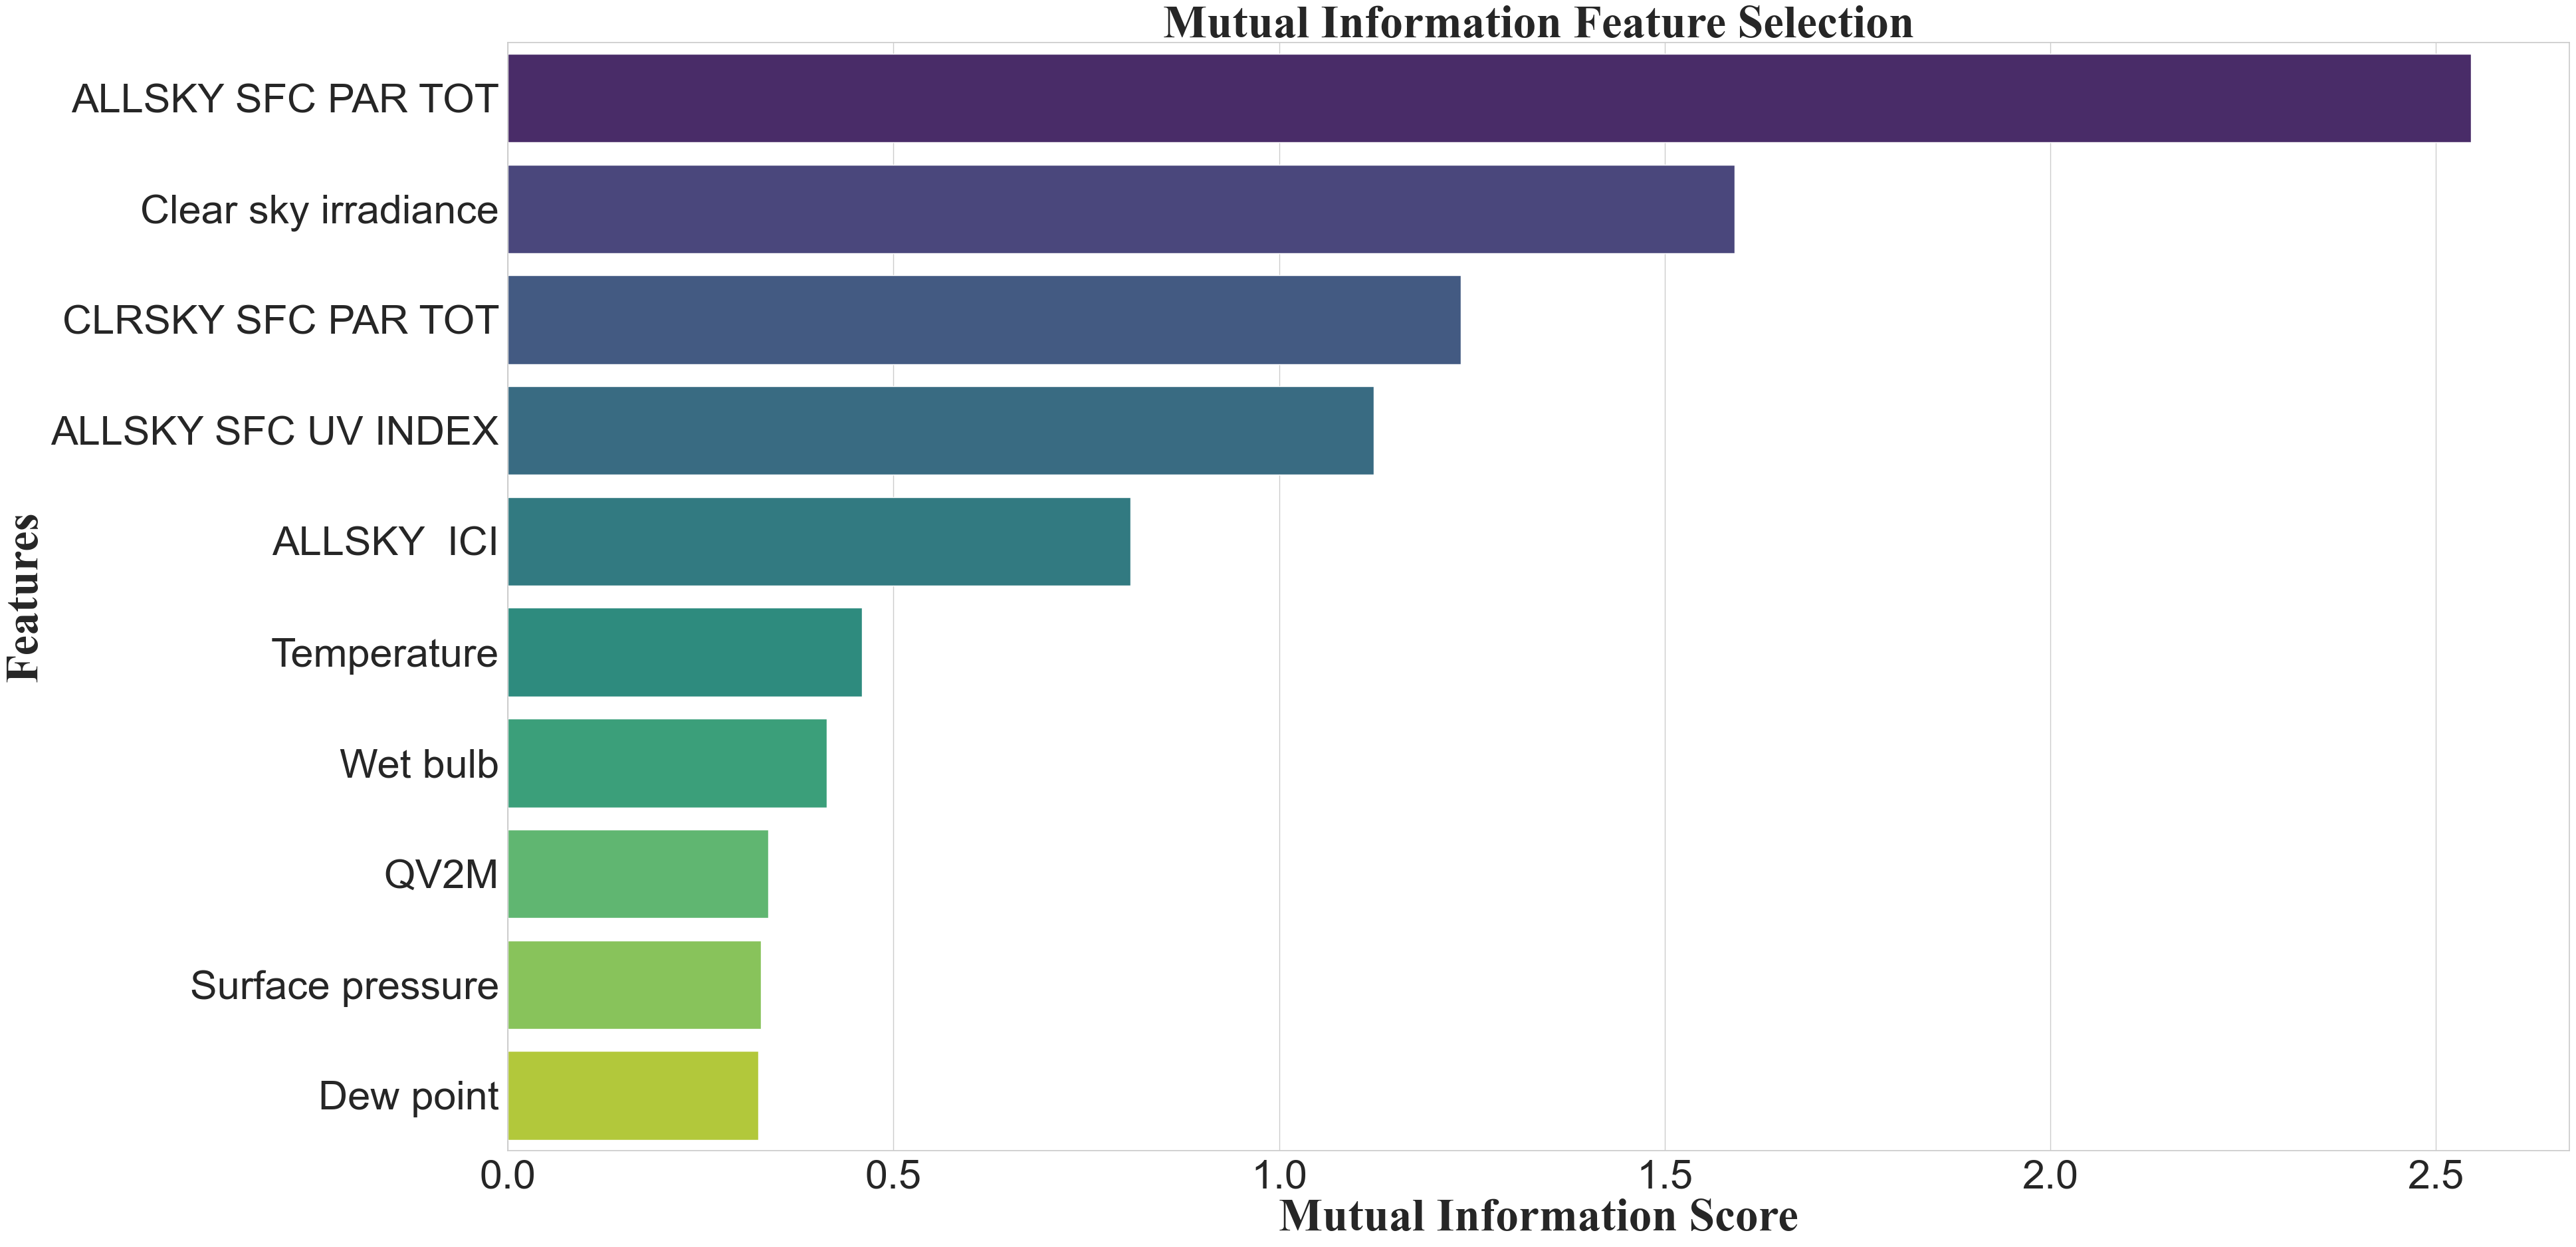

In [9]:
def plot_MI_scores(mi_scores_df, threshold=0.2, fig_size=(40, 20)):
    # Filter features based on the threshold
    filtered_mi_scores_df = mi_scores_df[mi_scores_df['MI Scores'] > threshold]
    
    if filtered_mi_scores_df.empty:
        print(f"No features exceed the threshold of {threshold}.")
        return
    
    plt.figure(figsize=fig_size)
    sns.set(font_scale=4, style="whitegrid")  # Set font scale and background style
    
    # Plot the features that exceed the threshold
    sns.barplot(x="MI Scores", y=filtered_mi_scores_df.index, 
                data=filtered_mi_scores_df, palette="viridis")
    
    # Add title and adjust layout with Times New Roman
    plt.title('Mutual Information Feature Selection', fontsize=50, fontweight="bold", fontname="Times New Roman")
    plt.xlabel('Mutual Information Score', fontsize=50, fontweight="bold", fontname="Times New Roman")
    plt.ylabel('Features', fontsize=50, fontweight="bold", fontname="Times New Roman")
    plt.tight_layout()
    
    # Save the plot in different formats
    plt.savefig('islamabad_MI_feature_importances.png')
    plt.savefig('islamabad_MI_feature_importances.pdf')
    plt.savefig('islamabad_MI_feature_importances.eps')
    
    # Show the plot
    plt.show()

# Plot the features based on MI scores with a specified threshold
plot_MI_scores(mi_scores_df, threshold=0.2)